In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O irish-lyrics-eof.txt

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [4]:
import numpy as np
import tensorflow as tf

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.01)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
    tf.keras.layers.LSTM(150),
    tf.keras.layers.Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

2022-04-16 22:51:18.648615: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-16 22:51:18.649287: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


Train on 12038 samples
Epoch 1/100


2022-04-16 22:51:19.996741: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_2690_3175_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_3318' and '__inference___backward_cudnn_lstm_with_fallback_2390_2572' both implement 'lstm_0e05a0db-5d48-4bdb-9d17-c7e7966b55c5' but their signatures do not match.


12038/12038 [==============================] - 50s 4ms/sample - loss: 6.6591 - accuracy: 0.0730
Epoch 2/100
12038/12038 [==============================] - 47s 4ms/sample - loss: 5.8213 - accuracy: 0.1115
Epoch 3/100
12038/12038 [==============================] - 47s 4ms/sample - loss: 5.0208 - accuracy: 0.1548
Epoch 4/100
12038/12038 [==============================] - 47s 4ms/sample - loss: 4.1237 - accuracy: 0.2224
Epoch 5/100
12038/12038 [==============================] - 46s 4ms/sample - loss: 3.2978 - accuracy: 0.3167
Epoch 6/100
12038/12038 [==============================] - 47s 4ms/sample - loss: 2.5784 - accuracy: 0.4250
Epoch 7/100
12038/12038 [==============================] - 54s 5ms/sample - loss: 2.0629 - accuracy: 0.5248
Epoch 8/100
12038/12038 [==============================] - 53s 4ms/sample - loss: 1.6860 - accuracy: 0.6042
Epoch 9/100
12038/12038 [==============================] - 56s 5ms/sample - loss: 1.4067 - accuracy: 0.6625
Epoch 10/100
12038/12038 [==============

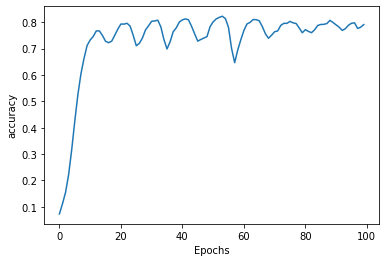

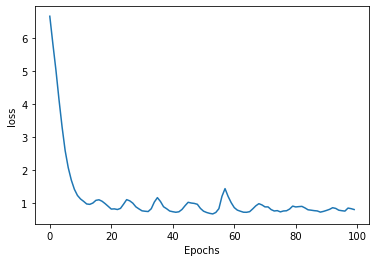

In [6]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  # plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [7]:
seed_text = "Laurence went to dublin"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text) 
#print(time.time())


2022-04-17 00:35:48.260543: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_116858_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_117161' and '__inference_cudnn_lstm_with_fallback_116969' both implement 'lstm_6c18e4bd-80a6-41f5-8955-f792d7f76cab' but their signatures do not match.


Laurence went to dublin whack follol thou mine your eyes on the high tower


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [10]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text) 

Laurence went to dublin whack follol thou mine your eyes on the high tower she said she is the dead of night unseen the bell of belfast city and mary the bold while the woman from the true love my did say me darling mother be kind into voice at me heart a way wid you father avick to know by the sunny shure stream forever your barley and the old tin cans be friendly face and the bold their journey to fulfill along by mountain sea may be rough be there at all dead love and i meet me one of thine own
